# [pandas is cool! LB: 0.63714](https://www.kaggle.com/clustifier/pandas-is-cool-lb-0-63714/code)

#### Questions: 
``` 
ad_likelihood['likelihood'] = (ad_likelihood['sum'] + 12*M) / (12 + ad_likelihood['count'])
```
#### Answers:
```
1. Regularization
2. When Ads show a lot of times, 'likelihood' tends to `ad_likelihood['sum'] / ad_likelihood['count']`
3. When Ads show few times, 'likelihood' tends to mean of all ads;
```

In [1]:
import pandas as pd
import numpy as np

dtypes = {'ad_id': np.float32, 'clicked': np.int8}

train = pd.read_csv("../data/unzip_data/clicks_train.csv", usecols=['ad_id','clicked'], dtype=dtypes)

ad_likelihood = train.groupby('ad_id').clicked.agg(['count','sum','mean']).reset_index()
M = train.clicked.mean()
del train

ad_likelihood['likelihood'] = (ad_likelihood['sum'] + 12*M) / (12 + ad_likelihood['count'])

test = pd.read_csv("../data/unzip_data/clicks_test.csv")
test = test.merge(ad_likelihood, how='left')
test.likelihood.fillna(M, inplace=True)

test.sort_values(['display_id','likelihood'], inplace=True, ascending=False)
subm = test.groupby('display_id').ad_id.apply(lambda x: " ".join(map(str,x))).reset_index()
subm.to_csv("subm.csv", index=False)

In [4]:
%%bash
kaggle competitions submit -c outbrain-click-prediction -f subm.csv -m "init submission: pandas is cool! LB: 0.63714"

Successfully submitted to Outbrain Click Prediction

## Further Study

1. This method can be taken as one way of feature engineering to get parameter `likelihood`
2. It provides one useful way to handle mean value:
    - high frequency: tends to the original value
    - low frequency: tends to the global mean value
    - none : use the global mean value as the default 
3. We learn the command line method to commit results.     

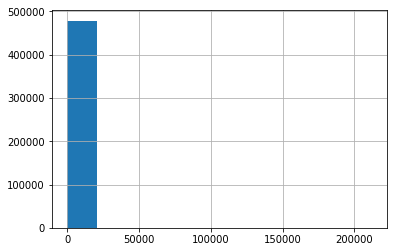

In [12]:
import matplotlib.pyplot as plt
ad_likelihood['count'].hist()
plt.show()